<a href="https://colab.research.google.com/github/farieu/data-analysis/blob/AnaliseExploratoria/eda_goodreads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória Good Reads

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/BackEnd/GoodReads_cleaned.csv')
#df = df[df['genre'] != "Unknown"]

## Análise Exploratória

Por conta do tamanho do dataset, foi aplicado uma versão reduzida (40% de amostragem para análise inicial) para que fosse possível efetuar a análise exploratória.

In [3]:
# Selecionar uma amostra de 40% do dataset, com o parâmetro de random state para que seja reprodutível e não mude a cada execução da cédula.
amostradf = df.sample(frac=0.4, random_state=30)

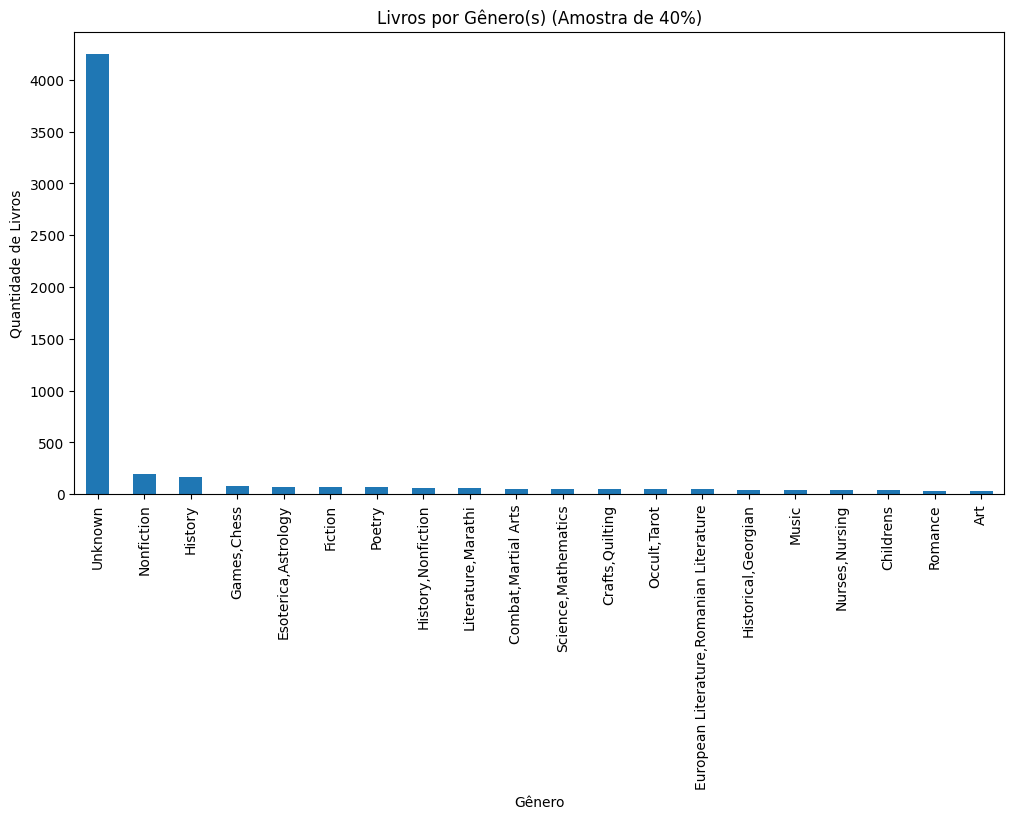

In [4]:
# Exemplo: Gráfico de quantidade de livros por gênero usando a amostra
genre_counts = amostradf['genre'].value_counts().nlargest(20)

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Livros por Gênero(s) (Amostra de 40%)')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Livros')
plt.xticks(rotation=90)
plt.show()


In [5]:
df.shape

(99999, 9)

O gênero "Unknown" impactou **negativamente** a análise exploratória, pois representa a imputação de dados ausentes que foi realizada durante o [tratamento do dataset](https://github.com/farieu/data-analysis/blob/LimpezaDataset/tratamento_goodreads.ipynb) na coluna 'genre'.

O valor acabou mascarando a distribuição real dos gêneros, dificultando a identificação de gêneros mais representativos. Para contornar a situação, foi necessário:


1.   Commit de um novo tratamento, dropando raw's com valores ausentes.
2.   No EDA, apenas dropei os valores ausentes a partir do dataset clean (e imputado), tornando assim o dataset IGUAL ao novo que foi commitado no arquivo **tratamento_goodreads_(sem_imputacao_de_dados).ipynb**



In [6]:
# Drop das linhas que foram imputadas.
df = df[df['genre'] != 'Unknown']

# Removendo linhas onde 'bookmark' é 'Unknown'
df = df[df['bookformat'] != 'Unknown']

# E removendo também onde a 'desc' é 'Description not available.'
df = df[df['desc'] != 'Description not available.']
df.shape

(84054, 9)

O dataset agora tem a mesma quantidade de linhas, colunas e informações que o [dataset sem imputação](https://drive.google.com/file/d/1hCGtL7hXSIxz2eBtfZLdIBnOy0PsnNhj/view?usp=sharing).

In [7]:
# Carregamento de 40% do Dataset, agora atualizado.
amostradf = df.sample(frac=0.4, random_state=30)

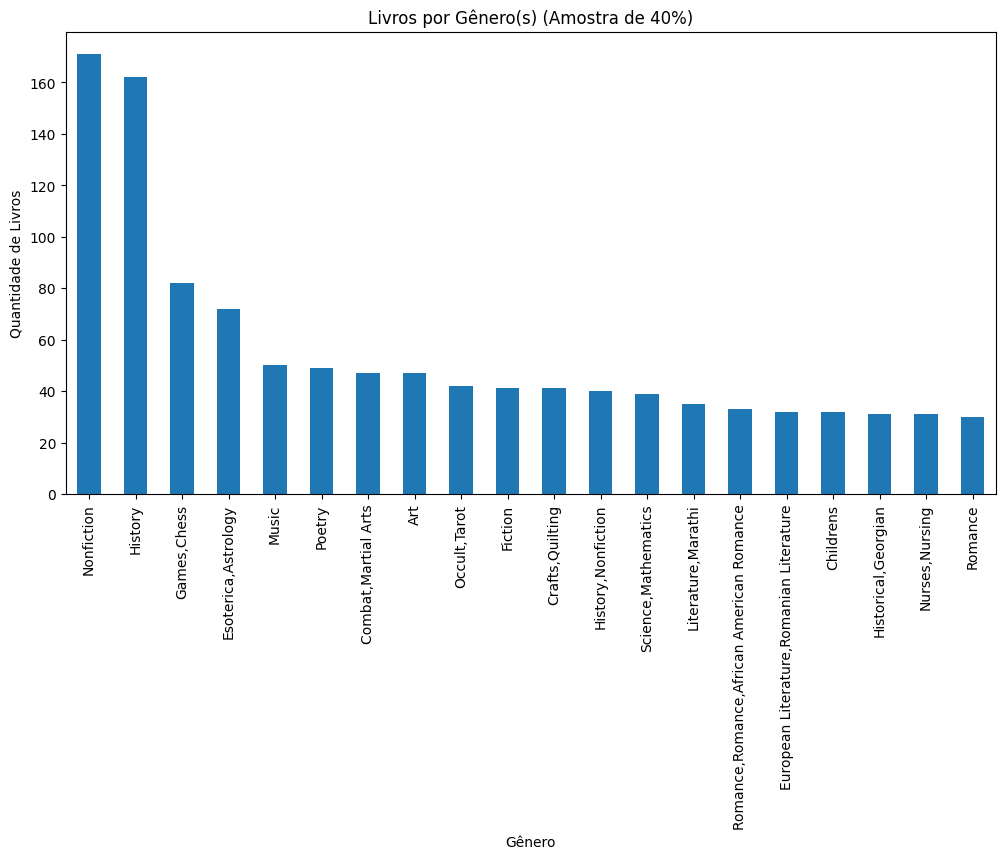

In [8]:
# Quantidade de Livros por gênero
genre_counts = amostradf['genre'].value_counts().nlargest(20)

# Plotar o gráfico de barras atualizado
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Livros por Gênero(s) (Amostra de 40%)')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Livros')
plt.xticks(rotation=90)
plt.show()

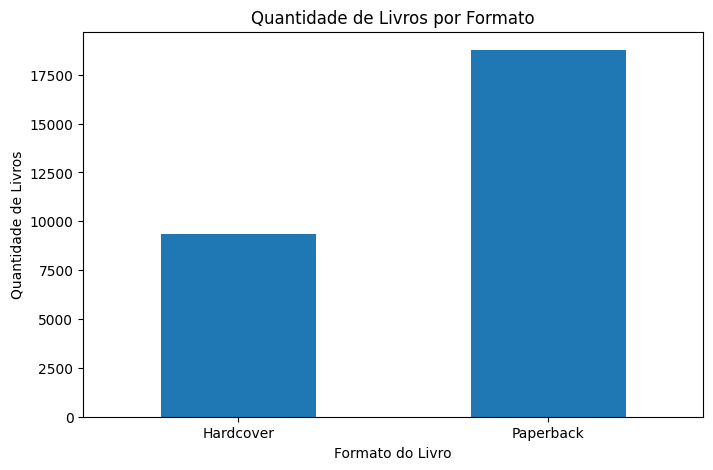

In [9]:
# Contar a quantidade de livros por formato (Hardcover e Paperback)
format_counts = amostradf['bookformat'].value_counts().loc[['Hardcover', 'Paperback']]

# Plotar o gráfico de barras
plt.figure(figsize=(8, 5))
format_counts.plot(kind='bar')
plt.title('Quantidade de Livros por Formato')
plt.xlabel('Formato do Livro')
plt.ylabel('Quantidade de Livros')
plt.xticks(rotation=0)
plt.show()

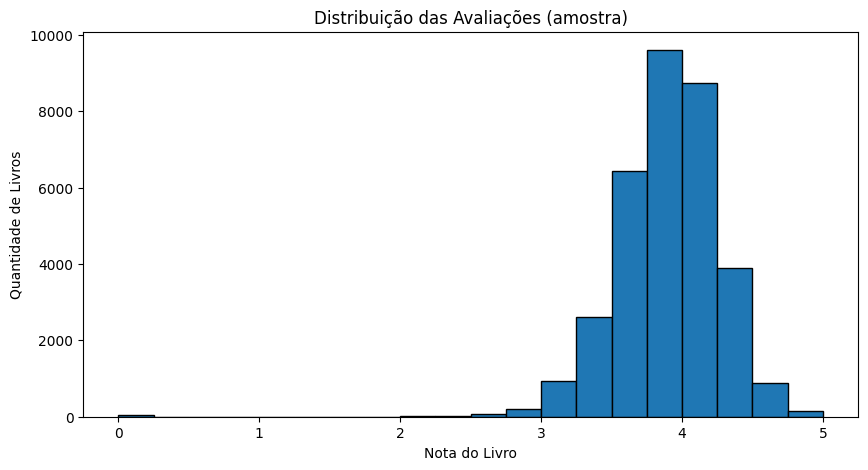

In [10]:
# Histograma das avaliações
plt.figure(figsize=(10, 5))
amostradf['rating'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribuição das Avaliações (amostra)')
plt.xlabel('Nota do Livro')
plt.ylabel('Quantidade de Livros')
plt.show()

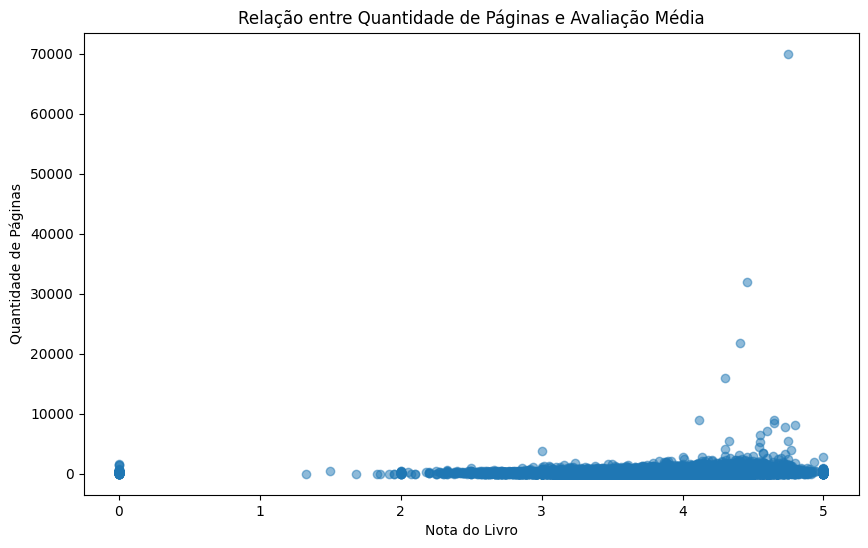

In [11]:
# Dispersão entre Qtd. páginas x Nota do Livro
plt.figure(figsize=(10, 6))
plt.scatter(df['rating'], df['pages'], alpha=0.5)
plt.title('Relação entre Quantidade de Páginas e Avaliação Média')
plt.xlabel('Nota do Livro')
plt.ylabel('Quantidade de Páginas')
plt.show()

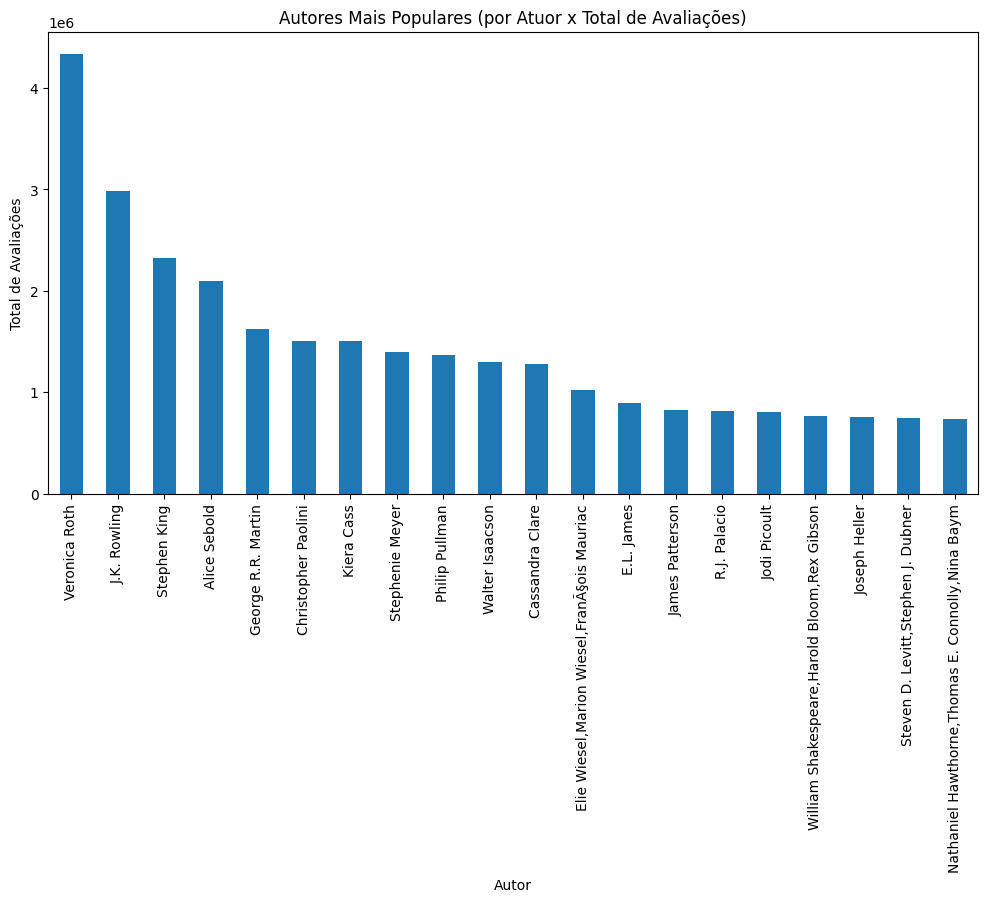

In [12]:
# Contagem de avaliações por autor (popularidade de autor)
top_authors = amostradf.groupby('author')['totalratings'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
top_authors.plot(kind='bar')
plt.title('Autores Mais Populares (por Atuor x Total de Avaliações)')
plt.xlabel('Autor')
plt.ylabel('Total de Avaliações')
plt.xticks(rotation=90)
plt.show()

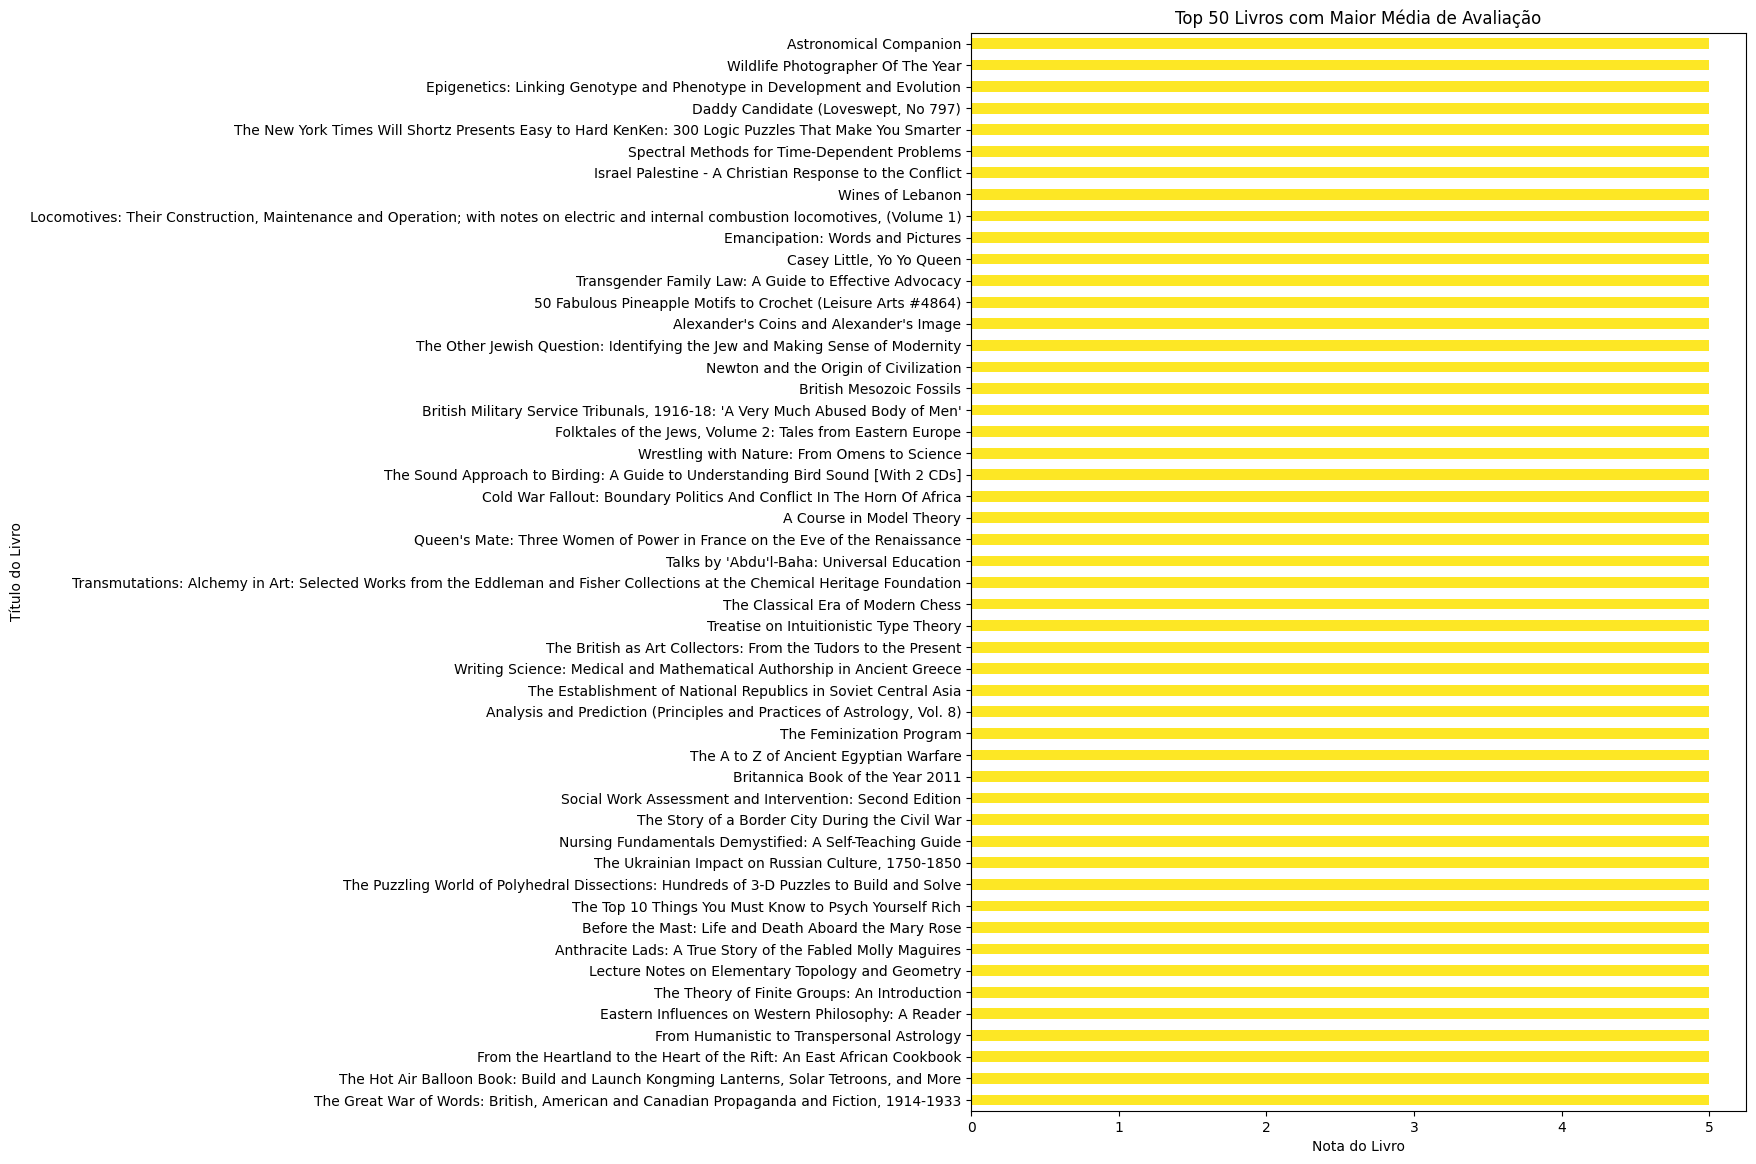

In [13]:
# Selecionar os 50 livros com a maior média de avaliação
top_livros_rating = amostradf.nlargest(50, 'rating')[['title', 'rating']].set_index('title')

# Plotar gráfico de barras horizontal dos livros com a maior média de avaliação, usando gradiente de cor
plt.figure(figsize=(10, 14))
top_livros_rating['rating'].sort_values().plot(kind='barh', color=plt.cm.viridis(top_livros_rating['rating'] / top_livros_rating['rating'].max()))
plt.title('Top 50 Livros com Maior Média de Avaliação')
plt.xlabel('Nota do Livro')
plt.ylabel('Título do Livro')
plt.show()


## Estatísticas descritivas de livros

Para evitar uma exibição desfuncional (conforme cédula anterior), é elaborado estatísticamente descritivo os 10 livros mais bem avaliados e menos avaliados.


In [14]:
# Obter os 10 livros mais bem avaliados (apenas título e avaliação)
top_rated_books = amostradf.sort_values(by='rating', ascending=False).head(20)[['author','title', 'rating', 'totalratings']]

# Obter os 10 livros menos bem avaliados (apenas título e avaliação)
lowest_rated_books = amostradf.sort_values(by='rating').head(20)[['author','title', 'rating', 'totalratings']]

# Exibir as tabelas
print("10 Livros Mais Bem Avaliados:")
display(top_rated_books)

print("\n10 Livros Menos Bem Avaliados:")
display(lowest_rated_books)


10 Livros Mais Bem Avaliados:


,author,title,rating,totalratings
37989,Jim McDermott,"British Military Service Tribunals, 1916-18: '...",5.0,2
40166,A. Morton Bell,"Locomotives: Their Construction, Maintenance a...",5.0,2
32021,"Michael Karam,Norbert Schiller",Wines of Lebanon,5.0,2
24998,"Dan Ben-Amos,Lenn Schramm,Dov NÃ´y","Folktales of the Jews, Volume 2: Tales from Ea...",5.0,5
94844,Peter Buitenhuis,"The Great War of Words: British, American and ...",5.0,1
154,Pauline Matarasso,Queen's Mate: Three Women of Power in France o...,5.0,4
19723,London Natural History Museum,British Mesozoic Fossils,5.0,2
69392,"Jed Z. Buchwald,Mordechai Feingold",Newton and the Origin of Civilization,5.0,2
67877,Craig Michael Nielsen,Israel Palestine - A Christian Response to the...,5.0,1
11677,Grant Bradford,Wildlife Photographer Of The Year,5.0,4



10 Livros Menos Bem Avaliados:


,author,title,rating,totalratings
30009,"Rosa Maria Falvo,Bengal Foundation,Rosa Maria ...",Kazi Ghiyasuddin: Contemporary Masters of Bang...,0.0,0
4176,Andrew Barr,Pinot Noir,0.0,0
29851,Paul F. Clark,"Forging a Union of Steel: Philip Murray, SWOC,...",0.0,0
89447,"Ravi Malhotra,Morgan Rowe",Exploring Disability Identity and Disability R...,0.0,0
16889,Steven Farkas,Zombie Roller Derby Chicks From Hell: A Dead C...,0.0,0
6285,G. Daan Cloete,Race and Reconciliation in South Africa: A Mul...,0.0,0
82009,Emergency Nurses Association,Emergency Nursing Scope and Standards of Pract...,0.0,0
25796,Carol S. Leonard,Agrarian Reform in Russia: The Road from Serfdom,0.0,0
49361,James Blowey,Frontiers Of Numerical Analysis: Durham 2004 (...,0.0,0
72130,Lee Haring,Stars and Keys: Folktales and Creolization in ...,0.0,0


O código que fiz não levava em consideração que pode existir livros que possuem baixas quantidades de avaliações (o que ocasiona em uma influencia maior quando recebe uma nota), e livros com notas altas porque possuem menos pessoas avaliando.

Como tentativa de contornar a situação e melhorar a análise, filtrei para que os livros tivessem um número significativo de avaliações, para garantir confiabilidade.

In [15]:
# Definir o limite mínimo de avaliações para garantir confiabilidade nas notas
m = amostradf['totalratings'].quantile(0.90)  # Limite mínimo: 90º percentil das avaliações

# Filtrar apenas livros com total de avaliações maior ou igual ao limite para os mais bem avaliados
livros_qualificados_top = amostradf[(amostradf['totalratings'] >= m)]

# Filtrar apenas livros com pelo menos uma avaliação para os menos bem avaliados (pelo menos garantir UMA avaliação)
livros_qualificados_low = amostradf[amostradf['totalratings'] > 0]

toprated_books = livros_qualificados_top.sort_values(by='rating', ascending=False).head(20)[['author', 'title', 'rating', 'totalratings']]

lowestrated_books = livros_qualificados_low.sort_values(by='rating').head(20)[['author', 'title', 'rating', 'totalratings']]

# Exibir as tabelas
print("20 Livros Mais Bem Avaliados (Com Número Significativo de Avaliações):")
display(toprated_books)

print("\n20 Livros Menos Bem Avaliados (Com Pelo Menos Uma Avaliação):")
display(lowestrated_books)


20 Livros Mais Bem Avaliados (Com Número Significativo de Avaliações):


,author,title,rating,totalratings
18097,Brandon Sanderson,"The Way of Kings, Part 2",4.79,14458
83603,Diana Gabaldon,The Outlander Series,4.73,8972
3689,"Neil Gaiman,Shawn McManus,Kelley Jones,Mike Dr...","The Absolute Sandman, Volume Two",4.68,7754
3559,"Hiromu Arakawa,Akira Watanabe","Fullmetal Alchemist, Vol. 25",4.66,5983
72175,"Paul Simpson,Helen Rodiss,Michaela Bushell,Ian...",The Rough Guide to the Lord of the Rings: Ever...,4.63,7880
57741,J.K. Rowling,Harry Potter and the Deathly Hallows,4.62,2984351
17636,"Bisco Hatori,è‘‰é³¥ãƒ“ã‚¹ã‚³",æ¡œè˜­é«˜æ ¡ãƒ›ã‚¹ãƒˆéƒ¨ 18,4.59,5974
48436,Shannon Messenger,Everblaze,4.59,20723
76888,Sherrilyn Kenyon,Styxx,4.58,20609
86616,Tiffany Reisz,The Saint,4.58,6826



20 Livros Menos Bem Avaliados (Com Pelo Menos Uma Avaliação):


,author,title,rating,totalratings
9525,Doris Sanford,Brian Was Adopted,1.33,3
86725,Eduardo Madeira,"Um rio chamado AngÃºstia (DN Contos Digitais, #5)",1.85,67
64990,Julia Duran,How to Journal for Personal Development: The G...,2.00,2
12186,Paul Dukes,Minutes to Midnight: History and the Anthropoc...,2.00,4
27539,Caroline Farr,Brecon Castle,2.00,1
3625,"James Kavanagh,Raymond Leung",Mammals: A Folding Pocket Guide to Familiar No...,2.00,1
70368,"Linda Causee,Rita Weiss",24-Hour Sewing Projects,2.00,8
3036,"Daniel E. Flath,Andrew M. Gleason,Sheldon P. G...",Multivariable Calculus,2.00,2
576,Boris Alterman,The Alterman Gambit Guide: Black Gambits 1,2.00,1
21450,"Susan Parker Beck,Pat Jennings",Elegant Beading for Sewing Machine and Serger:...,2.00,1


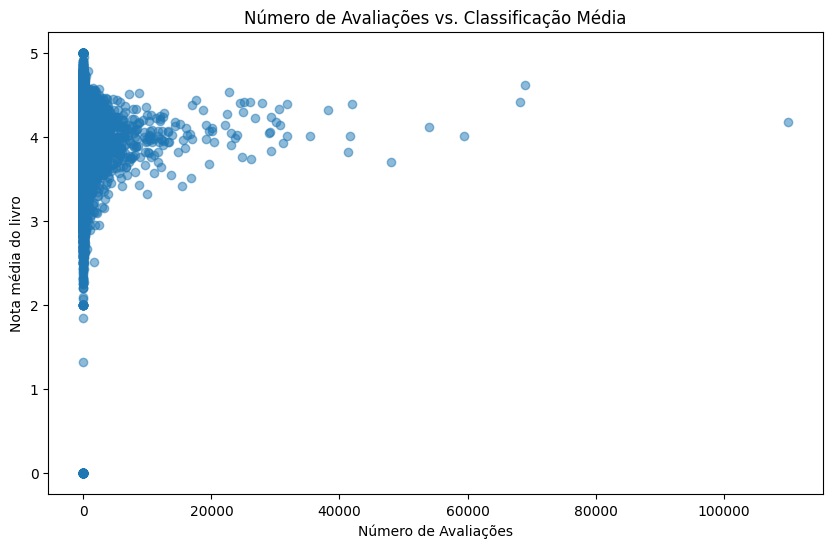

In [16]:
# Scatter plot entre Número de Avaliações e Classificação Média
plt.figure(figsize=(10, 6))
plt.scatter(amostradf['reviews'], amostradf['rating'], alpha=0.5)
plt.title('Número de Avaliações vs. Classificação Média')
plt.xlabel('Número de Avaliações')
plt.ylabel('Nota média do livro')
plt.show()

In [17]:
# Identificando o outlier (livro), com mais reviews e que tá fora do padrão.
livro_mais_reviews = amostradf.loc[amostradf['reviews'].idxmax()]
print(f"O livro com mais reviews é '{livro_mais_reviews['title']}' com {livro_mais_reviews['reviews']} reviews.")

O livro com mais reviews é 'Divergent' com 110042 reviews.
